In [143]:
# importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import time
import pandas as pd


***Below is the code for downloading and formatting the data.***

**Task 1**

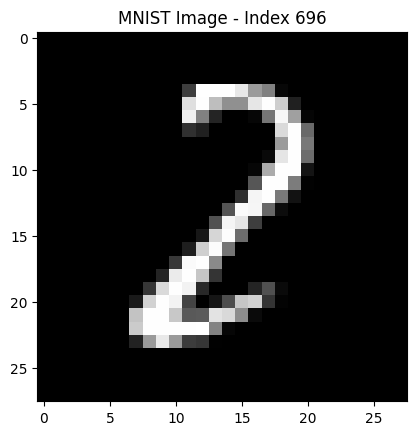

In [132]:
# lets Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##lets visualize one of the images from training set.
index = 696
image = X_train[index]  # Assuming X_train contains the MNIST images
plt.imshow(image, cmap='gray')
plt.title(f"MNIST Image - Index {index}")
plt.show()

In [133]:
##checking the shape
print("shape of training images"+str(X_train.shape))
print("shape of test images"+str(X_test.shape))
# converting into a 1D vector adn taking transpose and then scaling down[0,1]. 
X_train = X_train.reshape(X_train.shape[0], -1).T / 255
X_test = X_test.reshape(X_test.shape[0], -1).T / 255
print("shape of training images after reshaping"+str(X_train.shape))
print("shape of test images after reshaping"+str(X_test.shape))

shape of training images(60000, 28, 28)
shape of test images(10000, 28, 28)
shape of training images after reshaping(784, 60000)
shape of test images after reshaping(784, 10000)


In [134]:
##lets see the shape of the labels.
print("shape of training labels"+str(y_train.shape))
print("shape of test labels"+str(y_test.shape))

# performing one-hot encoding on the labes[0-9]
y_train_oh = np.eye(10)[y_train].T
y_test_oh = np.eye(10)[y_test].T

print("shape of training labels after OHE"+str(y_train_oh.shape))
print("shape of test labels after OHE"+str(y_test_oh.shape))

shape of training labels(60000,)
shape of test labels(10000,)
shape of training labels after OHE(10, 60000)
shape of test labels after OHE(10, 10000)


In [135]:
# Let us validate the One hot encoding
print(f"Index {index} - Row of y_train_oh: {y_train_oh[:, index]} - Value of y_train: {y_train[index]}")
print(f"Index {index} - Row of y_test_oh: {y_test_oh[:, index]} - Value of y_test: {y_test[index]}")

Index 696 - Row of y_train_oh: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] - Value of y_train: 2
Index 696 - Row of y_test_oh: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] - Value of y_test: 1


**Implementation for minibatch SGD for Linear MNIST Classifier**

****Task 2****

In [138]:
##defining a function to calculate loss function.
def calculate_loss(W, X, Y):
    y_pred = W @ X
    return np.mean(np.sum((y_pred - Y) ** 2, axis=0) / 2)

##defining a function to calculate accuracy.
def calculate_accuracy(W, X, Y):
    y_pred = np.argmax(W @ X, axis=0)
    y_true = np.argmax(Y, axis=0)
    return np.mean(y_pred == y_true)

##defining a function to update the weights usinfg SGD.
def update_weights(W, X_batch, y_batch, learning_rate):
    y_pred = W @ X_batch
    gradient = (y_pred - y_batch) @ X_batch.T / X_batch.shape[1]
    return W - learning_rate * gradient

##defining a function to plot training loss.
def plot_training_loss(train_losses, N_prime):
    plt.plot(train_losses, color='blue', label="Training Loss")
    plt.title(f"Training Loss (N'={N_prime})")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

##defining a function to plot accuracy.
def plot_accuracy(train_accs, test_accs, N_prime):
    plt.plot(train_accs, color='red', label="Train")
    plt.plot(test_accs, color='green', label="Test")
    plt.title(f"Accuracy (N'={N_prime})")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

#training the model.
def train_model(X_train, y_train_oh, X_test, y_test_oh, learning_rate, batch_size, iterations):
    W = np.zeros((10, 784)) ##initialiszing wights as give (W=0)
    #list to store traiinng losses, train accuracies and test accuracies.
    train_losses = []
    train_accs = []
    test_accs = []

    for i in range(iterations):
        # Selecting random batch with replacement
        idx = np.random.choice(X_train.shape[1], batch_size, replace=True)
        X_batch = X_train[:, idx]
        y_batch = y_train_oh[:, idx]

        # Update weights using SGD
        W = update_weights(W, X_batch, y_batch, learning_rate)

        # Calculating loss and accuracy on training set
        train_loss = calculate_loss(W, X_train, y_train_oh)
        train_acc = calculate_accuracy(W, X_train, y_train_oh)
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # Calculating loss and accuracy on test set
        test_acc = calculate_accuracy(W, X_test, y_test_oh)
        test_accs.append(test_acc)

        # let us see the progress as well.
        if i % 200 == 0:
          print(f"Iteration: {i} Train Loss: {train_loss} Train Accuracy: {train_acc*100:.2f}% Test Accuracy: {test_acc*100:.2f}%")

    return train_losses, train_accs, test_accs


**Let us check the Training and Test Accuracy and Loss for our SGD Linear MNIST Classifier**

In [139]:
batch_size  = 100
learning_rate = .001
iterations = 1000

print(f"Batch Size: {batch_size}")
train_losses, train_accs, test_accs = train_model(X_train, y_train_oh, X_test, y_test_oh, learning_rate, batch_size, iterations)
print("------------------------------------------------")
print()
print("------------------------------------------------")
print("The Training Accuracy is "+str(max(train_accs)))
print()
print("------------------------------------------------")
print("The test accuracy is "+str(max(test_accs)))

Batch Size: 100
Iteration: 0 Train Loss: 0.49533602390975773 Train Accuracy: 36.50% Test Accuracy: 36.90%
Iteration: 200 Train Loss: 0.3310384119782455 Train Accuracy: 76.34% Test Accuracy: 77.52%
Iteration: 400 Train Loss: 0.28684428956200414 Train Accuracy: 78.13% Test Accuracy: 79.04%
Iteration: 600 Train Loss: 0.26605990481251784 Train Accuracy: 80.08% Test Accuracy: 81.13%
Iteration: 800 Train Loss: 0.25407856702528986 Train Accuracy: 80.65% Test Accuracy: 81.60%
------------------------------------------------

------------------------------------------------
The Training Accuracy is 0.81325

------------------------------------------------
The test accuracy is 0.8229


****Task 3****

**Runnig Our Clasifier with Different batch sizes and determining learning rate corresponding to each batch size**

In [140]:
#refactored code
def Lets_exp_1(X_train, y_train_oh, X_test, y_test_oh, learning_rate, batch_sizes, iterations):
  ##iterating through learning rate
    for lr in learning_rate:
      ##iteerating through batch size
        for batch_size in batch_sizes:
            print(f"Batch Size: {batch_size} and Learning rate: {lr}")
            start_time = time.time()
            train_losses, train_accuracies, test_accuracies = train_model(X_train, y_train_oh, X_test, y_test_oh, lr, batch_size, iterations)
            end_time = time.time()
            print(f"(Learning Rate {lr}) Batch Size {batch_size}: Training time {end_time - start_time} seconds\n")
            
            # Plot the training loss
            plot_training_loss(train_losses, 100)

            # Plot the accuracy
            plot_accuracy(train_accuracies, test_accuracies, 100)


**Here, we have taken 3 different learning rates and 4 different batch sizes.**

In the below cell we have also reported the training time along with the ITR, and shown a plot for training loss vs iteration counter(ITR=1000) as well as test accuracy vs iteration counter(ITR=1000)

Batch Size: 1 and Learning rate: 0.1
Iteration: 0 Train Loss: 4.451776578336392 Train Accuracy: 10.22% Test Accuracy: 10.10%
Iteration: 200 Train Loss: 5.74663794310699e+133 Train Accuracy: 7.78% Test Accuracy: 7.32%
Iteration: 400 Train Loss: 1.1529438962989249e+268 Train Accuracy: 9.75% Test Accuracy: 9.74%


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-138-6e87b487f181>:4: RuntimeWarning: overflow encountered in square
  return np.mean(np.sum((y_pred - Y) ** 2, axis=0) / 2)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Iteration: 600 Train Loss: inf Train Accuracy: 9.98% Test Accuracy: 9.85%
Iteration: 800 Train Loss: inf Train Accuracy: 4.26% Test Accuracy: 4.48%


<ipython-input-138-6e87b487f181>:3: RuntimeWarning: overflow encountered in matmul
  y_pred = W @ X
<ipython-input-138-6e87b487f181>:8: RuntimeWarning: overflow encountered in matmul
  y_pred = np.argmax(W @ X, axis=0)
<ipython-input-138-6e87b487f181>:14: RuntimeWarning: overflow encountered in matmul
  y_pred = W @ X_batch
<ipython-input-138-6e87b487f181>:15: RuntimeWarning: invalid value encountered in matmul
  gradient = (y_pred - y_batch) @ X_batch.T / X_batch.shape[1]
<ipython-input-138-6e87b487f181>:3: RuntimeWarning: invalid value encountered in matmul
  y_pred = W @ X
<ipython-input-138-6e87b487f181>:8: RuntimeWarning: invalid value encountered in matmul
  y_pred = np.argmax(W @ X, axis=0)
<ipython-input-138-6e87b487f181>:14: RuntimeWarning: invalid value encountered in matmul
  y_pred = W @ X_batch


(Learning Rate 0.1) Batch Size 1: Training time 350.4811670780182 seconds



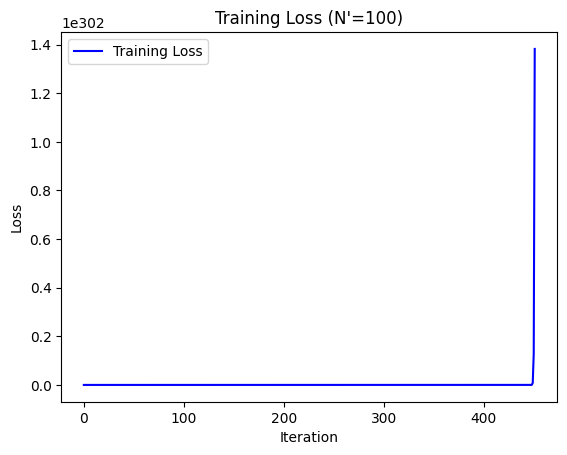

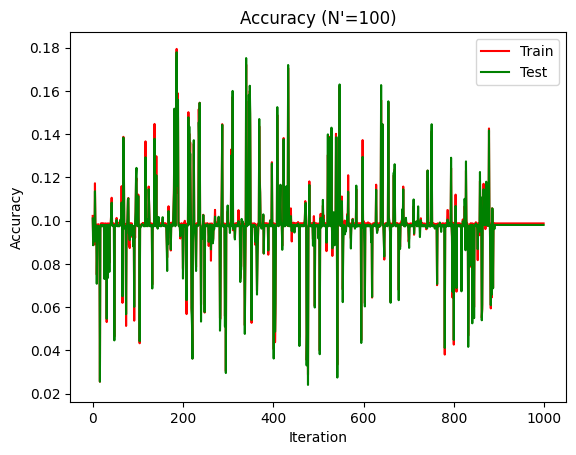

Batch Size: 10 and Learning rate: 0.1
Iteration: 0 Train Loss: 1.0614796122888028 Train Accuracy: 12.17% Test Accuracy: 12.15%
Iteration: 200 Train Loss: 4.825591815084132e+172 Train Accuracy: 9.04% Test Accuracy: 8.92%
Iteration: 400 Train Loss: inf Train Accuracy: 9.04% Test Accuracy: 8.92%
Iteration: 600 Train Loss: inf Train Accuracy: 9.04% Test Accuracy: 8.92%


<ipython-input-138-6e87b487f181>:15: RuntimeWarning: overflow encountered in matmul
  gradient = (y_pred - y_batch) @ X_batch.T / X_batch.shape[1]


Iteration: 800 Train Loss: nan Train Accuracy: 9.87% Test Accuracy: 9.80%
(Learning Rate 0.1) Batch Size 10: Training time 348.40838861465454 seconds



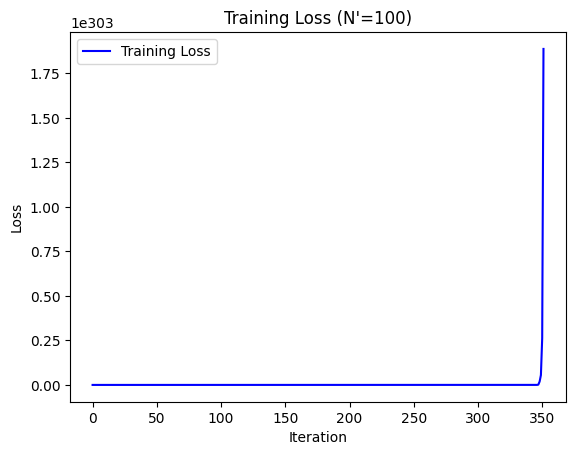

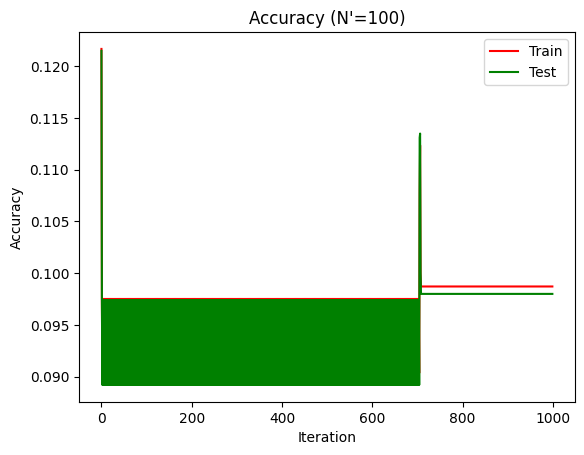

Batch Size: 100 and Learning rate: 0.1
Iteration: 0 Train Loss: 0.7605934116134951 Train Accuracy: 47.85% Test Accuracy: 49.63%
Iteration: 200 Train Loss: 1.3020060069124277e+179 Train Accuracy: 9.93% Test Accuracy: 10.32%
Iteration: 400 Train Loss: inf Train Accuracy: 9.93% Test Accuracy: 10.32%
Iteration: 600 Train Loss: inf Train Accuracy: 9.93% Test Accuracy: 10.32%
Iteration: 800 Train Loss: nan Train Accuracy: 9.87% Test Accuracy: 9.80%
(Learning Rate 0.1) Batch Size 100: Training time 348.14626932144165 seconds



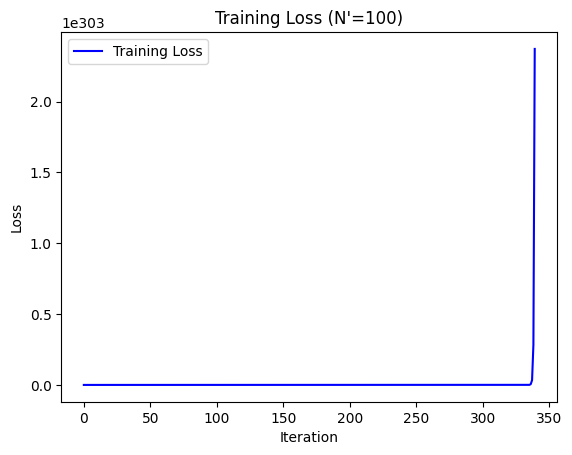

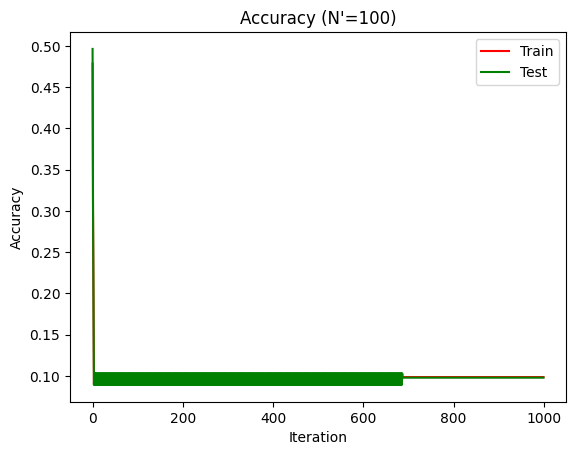

Batch Size: 1000 and Learning rate: 0.1
Iteration: 0 Train Loss: 0.7439311302061533 Train Accuracy: 58.70% Test Accuracy: 59.15%
Iteration: 200 Train Loss: 7.647505444986403e+178 Train Accuracy: 9.92% Test Accuracy: 10.09%
Iteration: 400 Train Loss: inf Train Accuracy: 9.92% Test Accuracy: 10.09%
Iteration: 600 Train Loss: inf Train Accuracy: 9.92% Test Accuracy: 10.09%
Iteration: 800 Train Loss: nan Train Accuracy: 9.87% Test Accuracy: 9.80%
(Learning Rate 0.1) Batch Size 1000: Training time 356.2946946620941 seconds



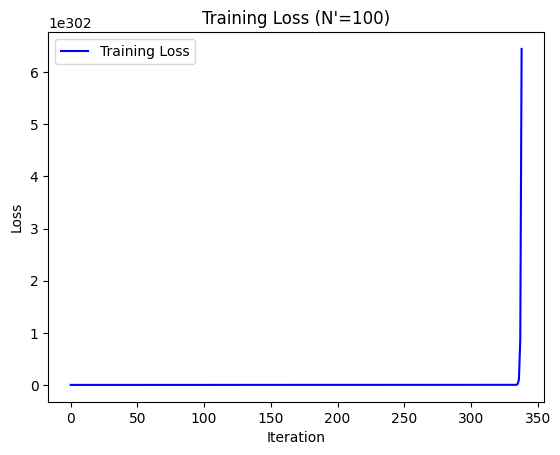

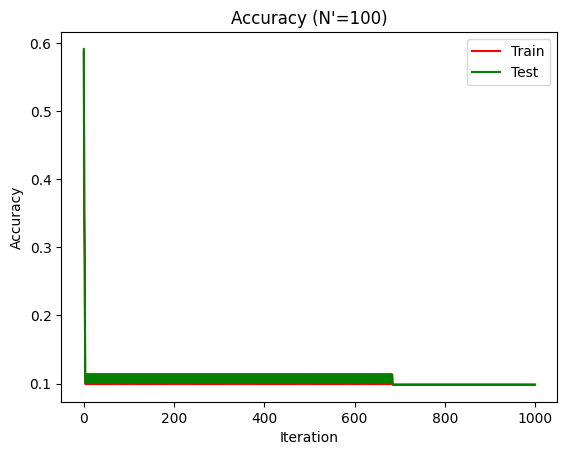

Batch Size: 1 and Learning rate: 0.01
Iteration: 0 Train Loss: 0.576308194744038 Train Accuracy: 9.86% Test Accuracy: 9.58%
Iteration: 200 Train Loss: 0.35963906693127196 Train Accuracy: 65.51% Test Accuracy: 65.50%
Iteration: 400 Train Loss: 0.3707005266706019 Train Accuracy: 67.67% Test Accuracy: 68.86%
Iteration: 600 Train Loss: 0.31914613345660076 Train Accuracy: 73.58% Test Accuracy: 74.75%
Iteration: 800 Train Loss: 0.3669203259024969 Train Accuracy: 68.15% Test Accuracy: 67.77%
(Learning Rate 0.01) Batch Size 1: Training time 348.89761781692505 seconds



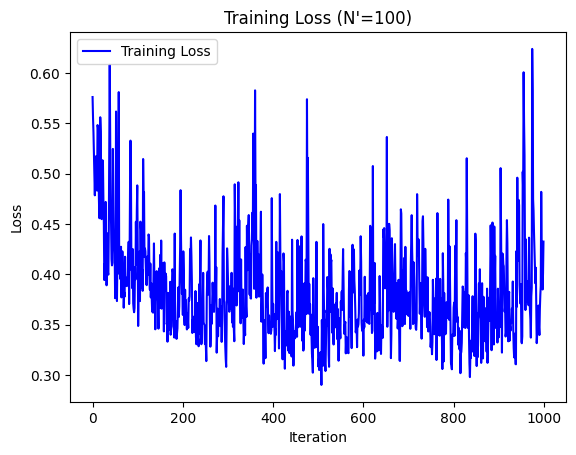

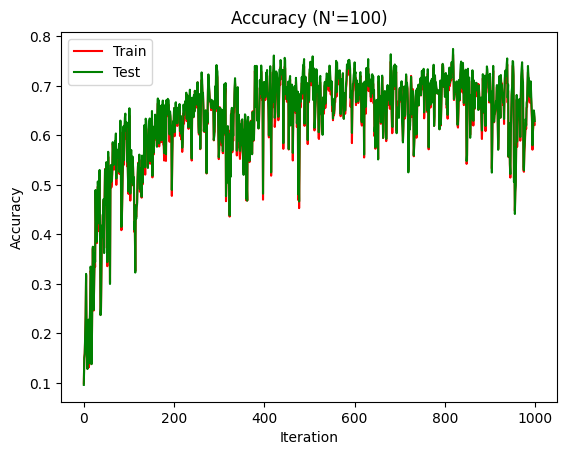

Batch Size: 10 and Learning rate: 0.01
Iteration: 0 Train Loss: 0.4741570327079718 Train Accuracy: 14.68% Test Accuracy: 15.38%
Iteration: 200 Train Loss: 0.2388131687091839 Train Accuracy: 80.09% Test Accuracy: 81.10%
Iteration: 400 Train Loss: 0.22995442921277054 Train Accuracy: 82.07% Test Accuracy: 82.87%
Iteration: 600 Train Loss: 0.22451999876196746 Train Accuracy: 83.23% Test Accuracy: 84.12%
Iteration: 800 Train Loss: 0.22795151098682118 Train Accuracy: 84.38% Test Accuracy: 85.34%
(Learning Rate 0.01) Batch Size 10: Training time 352.07200384140015 seconds



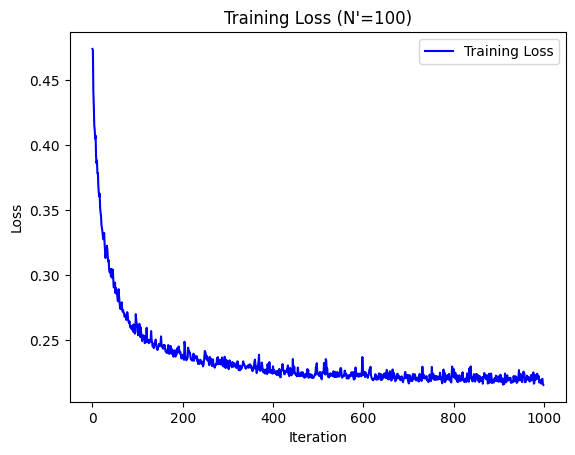

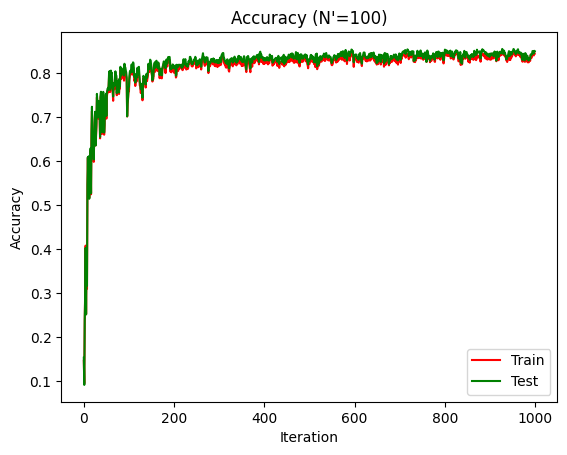

Batch Size: 100 and Learning rate: 0.01
Iteration: 0 Train Loss: 0.4624122459985802 Train Accuracy: 38.85% Test Accuracy: 39.41%
Iteration: 200 Train Loss: 0.22938107065753488 Train Accuracy: 83.48% Test Accuracy: 84.30%
Iteration: 400 Train Loss: 0.21858719227401488 Train Accuracy: 83.52% Test Accuracy: 84.35%
Iteration: 600 Train Loss: 0.21429885390411443 Train Accuracy: 84.28% Test Accuracy: 85.24%
Iteration: 800 Train Loss: 0.21170240837537546 Train Accuracy: 84.60% Test Accuracy: 85.32%
(Learning Rate 0.01) Batch Size 100: Training time 352.0482416152954 seconds



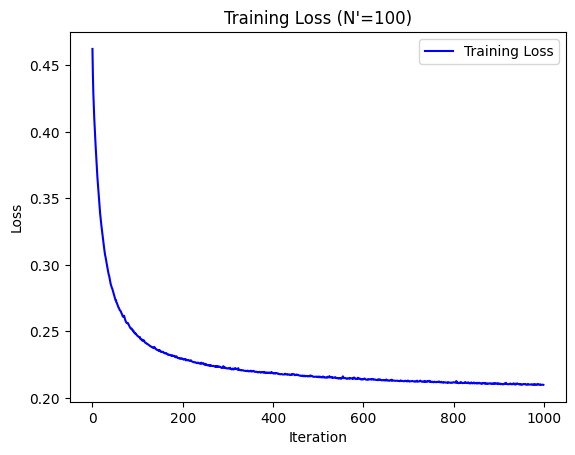

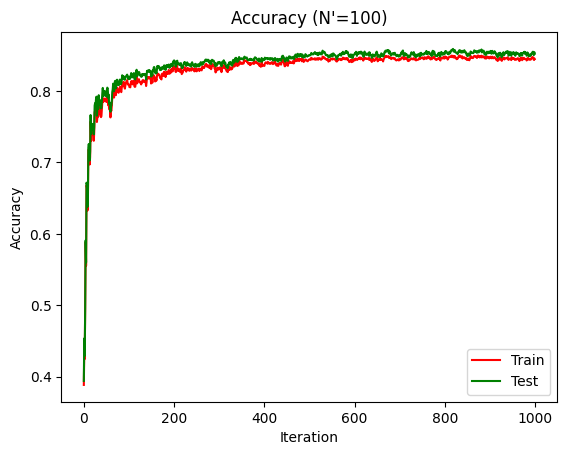

Batch Size: 1000 and Learning rate: 0.01
Iteration: 0 Train Loss: 0.46092864990936955 Train Accuracy: 55.27% Test Accuracy: 56.52%
Iteration: 200 Train Loss: 0.22814237250101682 Train Accuracy: 83.23% Test Accuracy: 83.73%
Iteration: 400 Train Loss: 0.21743413495354116 Train Accuracy: 84.06% Test Accuracy: 84.71%
Iteration: 600 Train Loss: 0.21316460448436897 Train Accuracy: 84.41% Test Accuracy: 85.12%
Iteration: 800 Train Loss: 0.21058122797782405 Train Accuracy: 84.81% Test Accuracy: 85.51%
(Learning Rate 0.01) Batch Size 1000: Training time 358.91104197502136 seconds



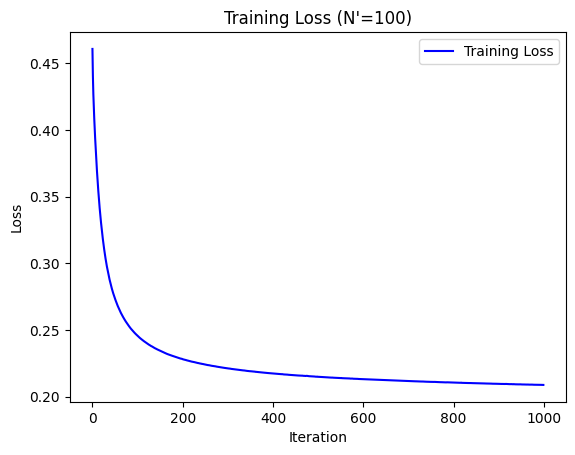

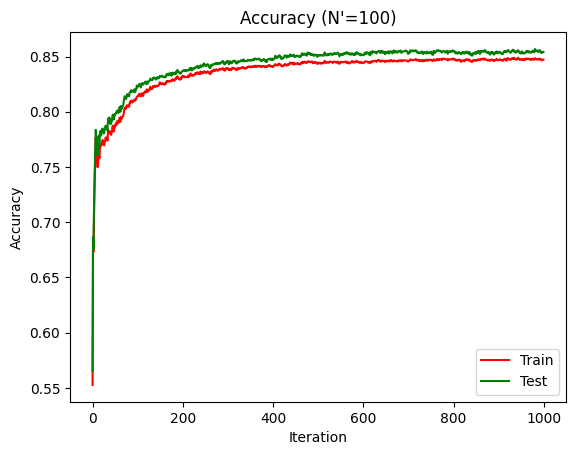

Batch Size: 1 and Learning rate: 0.001
Iteration: 0 Train Loss: 0.4941713419657906 Train Accuracy: 9.87% Test Accuracy: 9.80%
Iteration: 200 Train Loss: 0.3409794737122885 Train Accuracy: 60.93% Test Accuracy: 62.06%
Iteration: 400 Train Loss: 0.2989635027070349 Train Accuracy: 71.40% Test Accuracy: 71.55%
Iteration: 600 Train Loss: 0.2758992772791311 Train Accuracy: 73.65% Test Accuracy: 74.70%
Iteration: 800 Train Loss: 0.26438599405579055 Train Accuracy: 79.10% Test Accuracy: 80.32%
(Learning Rate 0.001) Batch Size 1: Training time 348.4151358604431 seconds



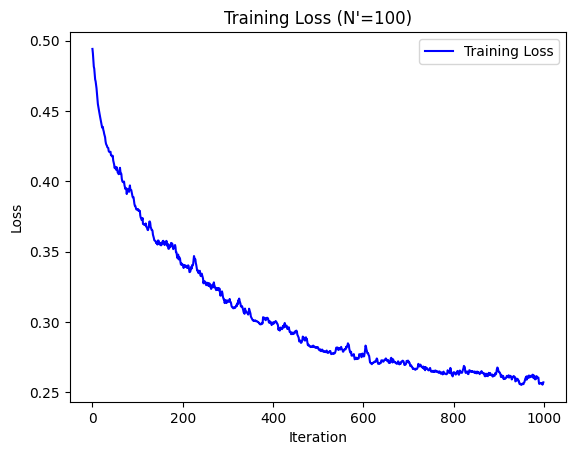

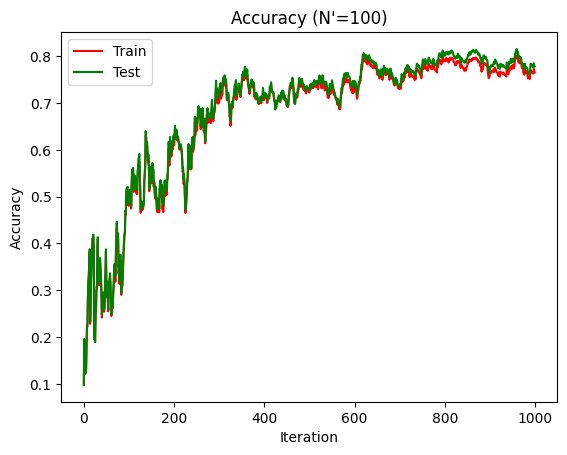

Batch Size: 10 and Learning rate: 0.001
Iteration: 0 Train Loss: 0.4952963645980021 Train Accuracy: 10.22% Test Accuracy: 10.10%
Iteration: 200 Train Loss: 0.3307803484113628 Train Accuracy: 73.99% Test Accuracy: 75.00%
Iteration: 400 Train Loss: 0.28679516763791185 Train Accuracy: 77.94% Test Accuracy: 78.83%
Iteration: 600 Train Loss: 0.26707835010455117 Train Accuracy: 78.42% Test Accuracy: 79.41%
Iteration: 800 Train Loss: 0.25476570077471655 Train Accuracy: 80.29% Test Accuracy: 81.37%
(Learning Rate 0.001) Batch Size 10: Training time 349.3376929759979 seconds



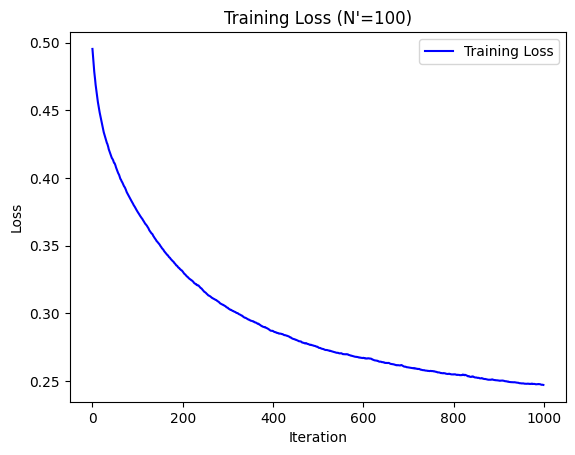

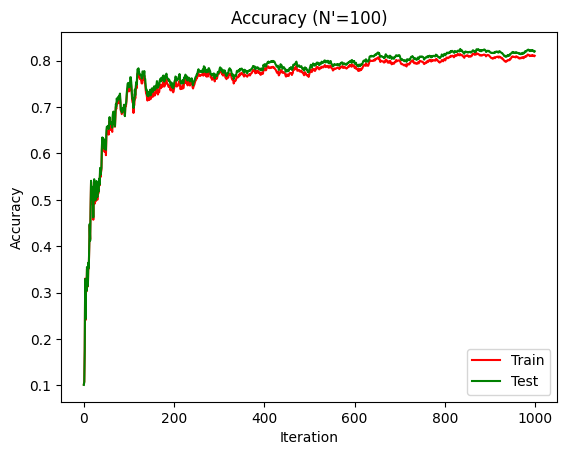

Batch Size: 100 and Learning rate: 0.001
Iteration: 0 Train Loss: 0.495535646100367 Train Accuracy: 41.41% Test Accuracy: 40.78%
Iteration: 200 Train Loss: 0.33078046668622757 Train Accuracy: 76.09% Test Accuracy: 77.28%
Iteration: 400 Train Loss: 0.2865478224910852 Train Accuracy: 78.82% Test Accuracy: 80.15%
Iteration: 600 Train Loss: 0.26585351756050934 Train Accuracy: 79.97% Test Accuracy: 81.08%
Iteration: 800 Train Loss: 0.25393241145321943 Train Accuracy: 80.49% Test Accuracy: 81.56%
(Learning Rate 0.001) Batch Size 100: Training time 349.4352195262909 seconds



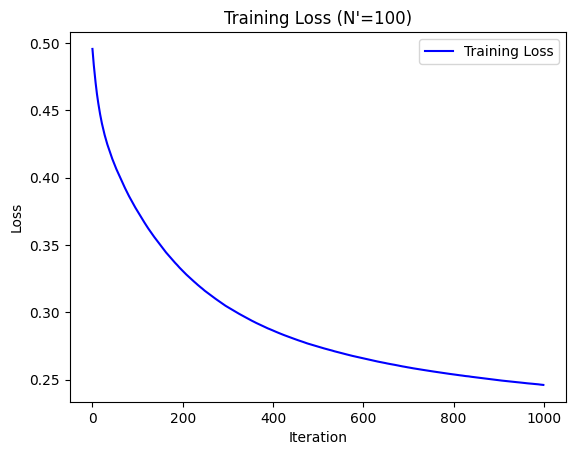

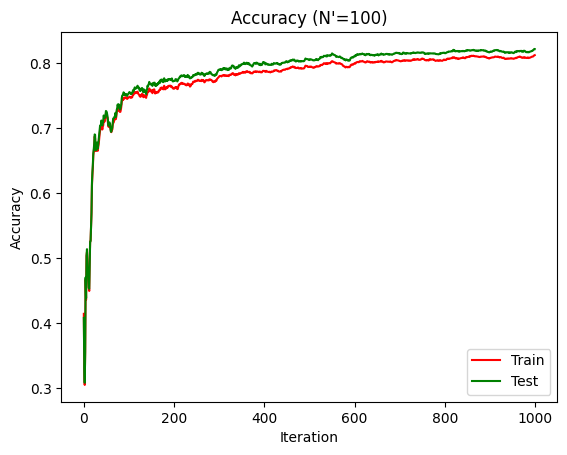

Batch Size: 1000 and Learning rate: 0.001
Iteration: 0 Train Loss: 0.4954598665352593 Train Accuracy: 36.13% Test Accuracy: 37.53%
Iteration: 200 Train Loss: 0.3310255657181936 Train Accuracy: 76.77% Test Accuracy: 78.11%
Iteration: 400 Train Loss: 0.2865862547093966 Train Accuracy: 78.35% Test Accuracy: 79.44%
Iteration: 600 Train Loss: 0.26574353010037244 Train Accuracy: 79.72% Test Accuracy: 80.78%
Iteration: 800 Train Loss: 0.25377987847398464 Train Accuracy: 80.74% Test Accuracy: 81.73%
(Learning Rate 0.001) Batch Size 1000: Training time 356.2880563735962 seconds



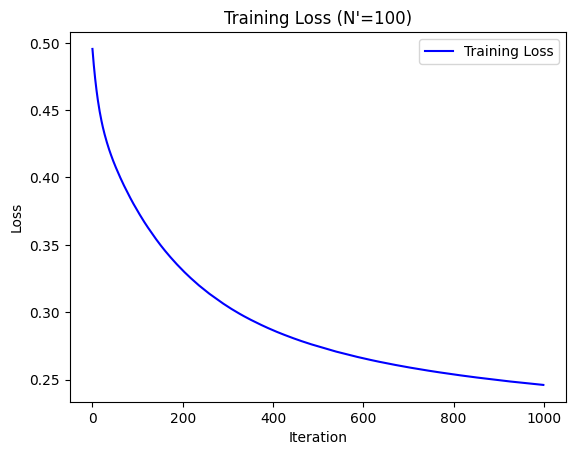

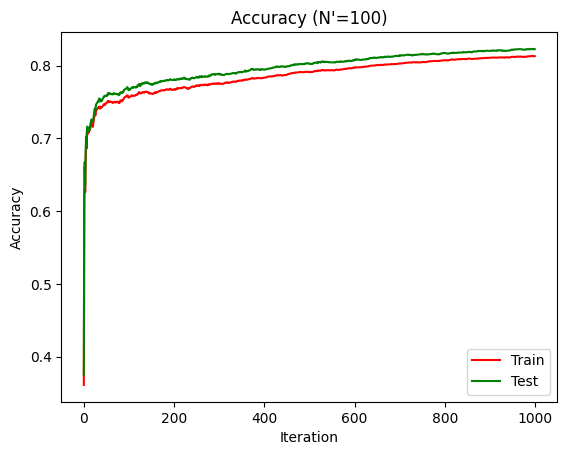

In [141]:
# Let us define the hyperparameters
learning_rate = [0.1, 0.01, 0.001]
batch_sizes = [1, 10, 100, 1000]
iterations = 1000

# lets experiment with different batch sizes and learning rate keeping iterations constatnt
Lets_exp_1(X_train, y_train_oh, X_test, y_test_oh, learning_rate, batch_sizes, iterations)

**Lets see a table for this as well**

In [144]:
##creating a dictionary
results_dict = {
    "Batch Size": [batch_size] * iterations,
    "Learning Rate": [learning_rate] * iterations,
    "Train Loss": train_losses,
    "Train Accuracy": train_accs,
    "Test Accuracy": test_accs
}
##putting it into a dataframe
results_df = pd.DataFrame(results_dict)

print(results_df)

     Batch Size       Learning Rate  Train Loss  Train Accuracy  Test Accuracy
0           100  [0.1, 0.01, 0.001]    0.495336        0.365033         0.3690
1           100  [0.1, 0.01, 0.001]    0.491195        0.377067         0.3835
2           100  [0.1, 0.01, 0.001]    0.487248        0.373933         0.3786
3           100  [0.1, 0.01, 0.001]    0.483546        0.462633         0.4673
4           100  [0.1, 0.01, 0.001]    0.479815        0.493317         0.5053
..          ...                 ...         ...             ...            ...
995         100  [0.1, 0.01, 0.001]    0.246283        0.813117         0.8225
996         100  [0.1, 0.01, 0.001]    0.246253        0.812800         0.8221
997         100  [0.1, 0.01, 0.001]    0.246216        0.812733         0.8213
998         100  [0.1, 0.01, 0.001]    0.246188        0.813067         0.8214
999         100  [0.1, 0.01, 0.001]    0.246152        0.812867         0.8214

[1000 rows x 5 columns]


In [145]:
results_df = pd.DataFrame(results_dict)
last_values = results_df.iloc[-1]
last_values_table = pd.DataFrame(last_values).transpose()
print("Last Values Table:")
print(last_values_table)

Last Values Table:
    Batch Size       Learning Rate Train Loss Train Accuracy Test Accuracy
999        100  [0.1, 0.01, 0.001]   0.246152       0.812867        0.8214


**1. For batch size 1: the best learning rate is: 0.001**

**2. For batch size 10: the best learning rate is: 0.01**

**3. For batch size 100: the best learning rate is: 0.01**

**4. For batch size 1000: the best learning rate is: 0.01**



**Task 4**

**-----Comment on the role of Batch Size-----**

1. As we can see from the table above the maximum accuracy that we are getting is 82.14% accuracy and learning rate is 0.001.
2. Smaller Batch sizes mean noisier model parameter adjustments this can improve convergence but trap the model in local minima.
3. Large batch sizes reduce model parameter updates and noise which also slows convergence and the train and test accuracy improves. But after a while the accuracy also appears to remain constant as can be seen from the graphs above. 
4. Also, the batch size directly affects the time. 
4. Thus, batch size depends on the dataset size, model complexity and desired convergence speed.

**Task 5**

Below we have picked a subset S' keeping fixed batch size = 100 and applying it on N'{100,500,1000,10000}.

In [115]:
def Lets_exp_2(X_train, y_train, X_test, y_test, learning_rate, setter):
    ##let us set the batchg size
    batch_size = 100
    ## the number of iterations
    iterations = 500
    for let in setter:
        # Select subset of training data that S' from N(total data)
        (X_train, y_train), (X_test, y_test) = mnist.load_data()
        idx = np.random.choice(X_train.shape[0], let, replace=False) ##selecting randomly without any type of replacement.
        ## selecting a subset from traing images and labels
        X_train_prime = X_train[idx, :]
        y_train_prime = y_train[idx]

        # Preprocess data
        # Normalize pixel values between 0 and 1
        X_train_prime = X_train_prime.astype('float32') / 255 
        X_test = X_test.astype('float32') / 255
        # Flatten the training and test images
        X_train_prime = X_train_prime.reshape(X_train_prime.shape[0], -1).T
        X_test = X_test.reshape(X_test.shape[0], -1).T
        # Convert training and test labels to one-hot encoding
        y_train_oh = np.eye(10)[y_train_prime].T
        y_test_oh = np.eye(10)[y_test].T

        # Train using minibatch SGD
        train_losses, train_accs, test_accs = train_model(X_train_prime, y_train_oh, X_test, y_test_oh, learning_rate, batch_size, iterations)
        
        # lets us see the results by plotting
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

        ax[0].plot(train_losses, color='blue')
        ax[0].set_title(f"Training Loss (N'={let})\nLearning Rate: {learning_rate}, Batch Size: {let}", fontsize=16)
        ax[0].set_xlabel("Iteration", fontsize=12)
        ax[0].set_ylabel("Loss", fontsize=12)

        ax[1].plot(train_accs, label="Train", color='blue')
        ax[1].plot(test_accs, label="Test", color='green')
        ax[1].set_title(f"Accuracy (N'={let})\nLearning Rate: {learning_rate}, Batch Size: {let}", fontsize=16)
        ax[1].set_xlabel("Iteration", fontsize=12)
        ax[1].set_ylabel("Accuracy", fontsize=12)
        ax[1].legend()

        ax[0].grid(True)
        ax[1].grid(True)

        plt.tight_layout()
        plt.show()


Iteration: 0 Train Loss: 0.49485565002121484 Train Accuracy: 27.0 Test Accuracy: 20.22
Iteration: 200 Train Loss: 0.30529604867060683 Train Accuracy: 89.0 Test Accuracy: 59.72
Iteration: 400 Train Loss: 0.24750493915286637 Train Accuracy: 93.0 Test Accuracy: 66.75999999999999


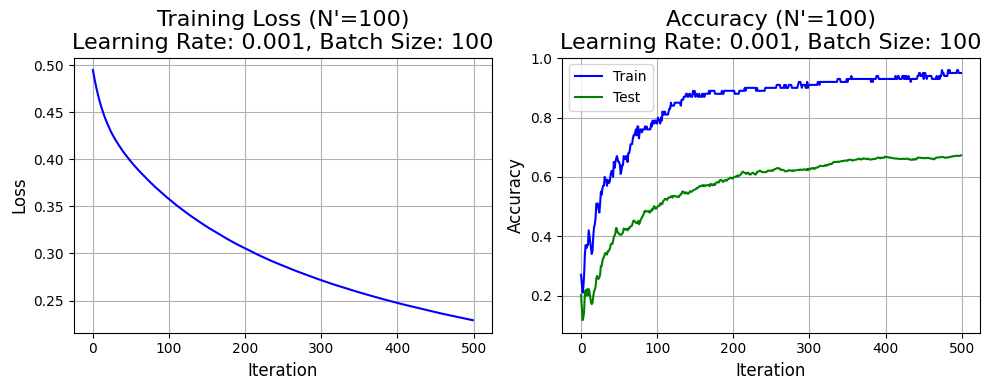

Iteration: 0 Train Loss: 0.4955655605167011 Train Accuracy: 26.8 Test Accuracy: 26.240000000000002
Iteration: 200 Train Loss: 0.3224390761864116 Train Accuracy: 79.2 Test Accuracy: 75.77000000000001
Iteration: 400 Train Loss: 0.2734663288246468 Train Accuracy: 81.39999999999999 Test Accuracy: 77.75


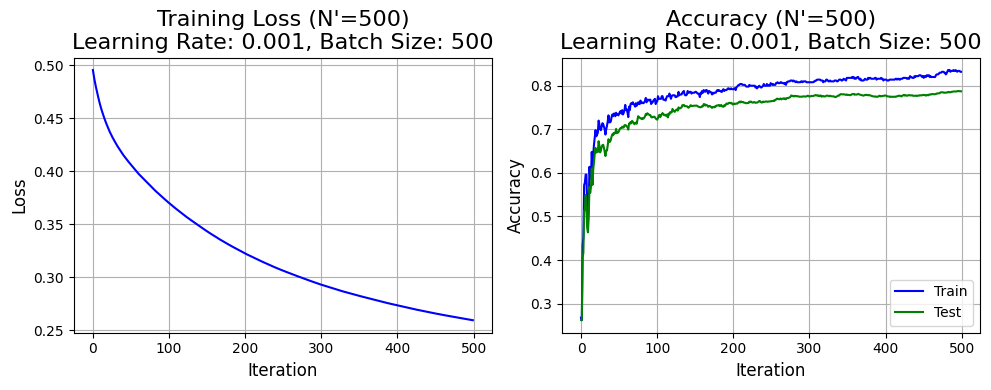

Iteration: 0 Train Loss: 0.4952046866562633 Train Accuracy: 22.7 Test Accuracy: 19.02
Iteration: 200 Train Loss: 0.32084902957700634 Train Accuracy: 75.7 Test Accuracy: 72.45
Iteration: 400 Train Loss: 0.27429488640531907 Train Accuracy: 78.2 Test Accuracy: 74.33999999999999


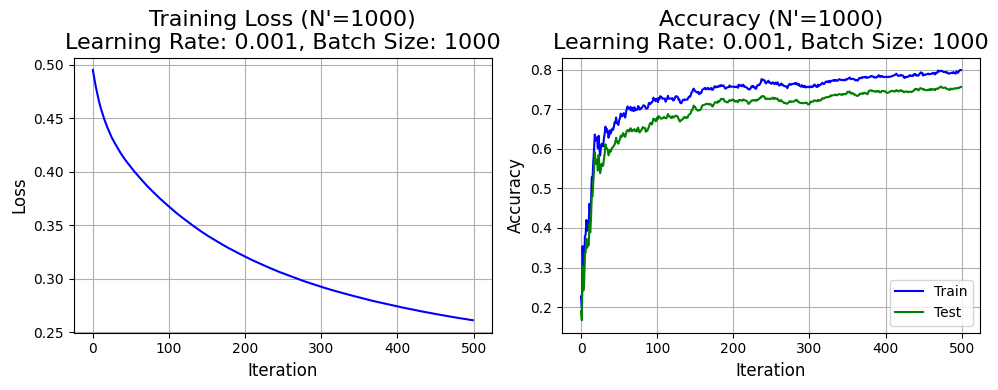

Iteration: 0 Train Loss: 0.4955809973973307 Train Accuracy: 48.1 Test Accuracy: 48.59
Iteration: 200 Train Loss: 0.3311971435869081 Train Accuracy: 76.52 Test Accuracy: 77.27000000000001
Iteration: 400 Train Loss: 0.28677243429749966 Train Accuracy: 78.43 Test Accuracy: 79.14999999999999


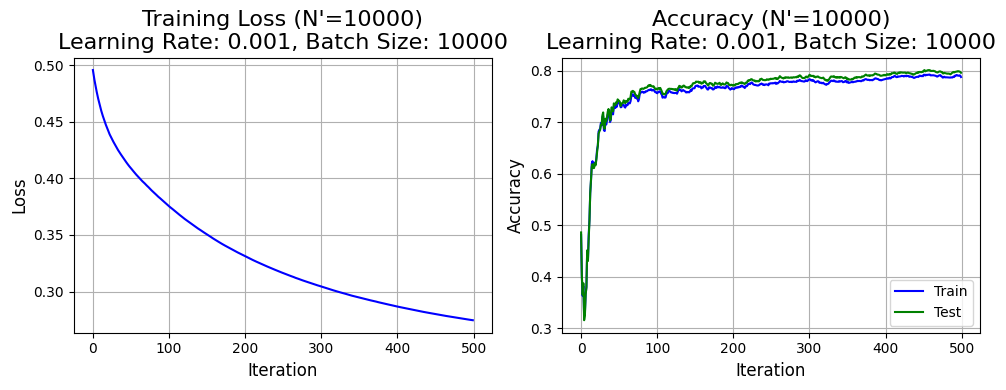

In [116]:
learning_rate = .001
setter = [100, 500, 1000, 10000]
Lets_exp_2(X_train, y_train, X_test, y_test, learning_rate, setter)

**Comment on the role of batch size**

Here, we have kept the number of iterations as 500 with a fixed batch size of 100. 

1. When the dataset size is only 100, it is a very small sample, and it might not provide enough information for the model to learn the underlying patterns adequately and that can be seen from the first plot. The model's accuracy is limited(66.75%) and it struggle to generalize well to unseen data.

2. Increasing the dataset size to 500 provides the model with more examples to learn from. This larger sample size allows the model to capture a wider range of patterns and variations in the data. As a result, the model's accuracy improves to 77.75% that can be seen in plot 2, compared to the previous plot.

3. With a dataset size of 1000, the model has even more examples to train on. The accuracy of the model is likely to be higher compared to the previous scenarios but we see a slight decreasing difference (74.33%) as can be seen in plot 3 but that can be overcome if we increase the number of iterations to 1000.

4. Increasing the dataset size to 10000 provides a substantial amount of training data for the model. The increased dataset size is expected to result in improved generalization and better performance on unseen data and thus achieves an accuracy of 79.14% as can be seen in plot 4.

Overall, as the dataset size increases from 100 to 10000 while keeping the batch size constant, we saw a trend of improving accuracy. However, there is a possibility that as the dataset size becomes very large the model's performance improvement start to plateau.

**Pytorch Implementation**

In [120]:
##importing the required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [ ]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32') / 255.
y = mnist.target.astype('int64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode the target variable
def convert_to_one_hot(y):
    n_values = np.max(y) + 1
    return np.eye(n_values)[y]

y_train_oh = convert_to_one_hot(y_train)
y_test_oh = convert_to_one_hot(y_test)

In [ ]:
# lets define the linear model
def LinearModel():
   # Create a linear model with 784 input features and 10 output features
    model = nn.Linear(784, 10, bias=True)
    with torch.no_grad():
      ##setting the initial weights as before (W=0)
        model.weight.zero_() 
        model.bias.zero_() 
    return model

def MSE():
  # here we are making our mean squared error (MSE) loss function(Quadratic function)
    return nn.MSELoss()

def SGD(model, lr):
    # stochastic gradient descent (SGD) optimizer
    # with a specified learning rate (same as before)
    return torch.optim.SGD(model.parameters(), lr=lr)

def accuracy(y_true, y_pred):
    y_true = y_true.values
    # Convert the true labels to numpy array
    # The predicted labels from the graph and convert to numpy array
    y_pred = y_pred.detach().numpy().argmax(1)
    # Calculating the accuracy as the percentage of correct predictions
    return 100 * np.mean(y_true == y_pred)

# Dlets train using pytorcjh
def train(model, x_train, y_train_oh, criterion, optimizer, batch_size, n_epochs, n_iters, x_test, y_test_oh):
    # lists to store accuracus (trainig and test) and loss.
    all_loss = []
    train_acc = []
    test_acc = []

    for epoch in range(n_epochs):
        for iter in range(n_iters):
            # Generating a random batch of size batch_size
            random_batch_indices = torch.randint(x_train.shape[0], (batch_size,))
            x_batch = torch.tensor(x_train.iloc[random_batch_indices].values)
            y_batch = torch.tensor(y_train_oh[random_batch_indices])

            # Forward pass
            output = model(x_batch.float())
            # Loss function
            loss = criterion(output, y_batch.float())

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            output = model(torch.tensor(x_train.values).float())
            train_l = criterion(output, torch.tensor(y_train_oh).float())
            all_loss.append(train_l)

            train_acc.append(accuracy(y_train, output))
            
            output = model(torch.tensor(x_test.values).float())
            test_acc.append(accuracy(y_test, output))

    return all_loss, train_acc, test_acc

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


-------------------------------------------------------------
Training Accuracy with pytorch implementation is (Batch_size=100 and Learning_rate=0.001):85.8125
-------------------------------------------------------------
Test Accuracy with pytorch implementation is (Batch_size=100 and Learning_rate=0.001):85.72857142857143



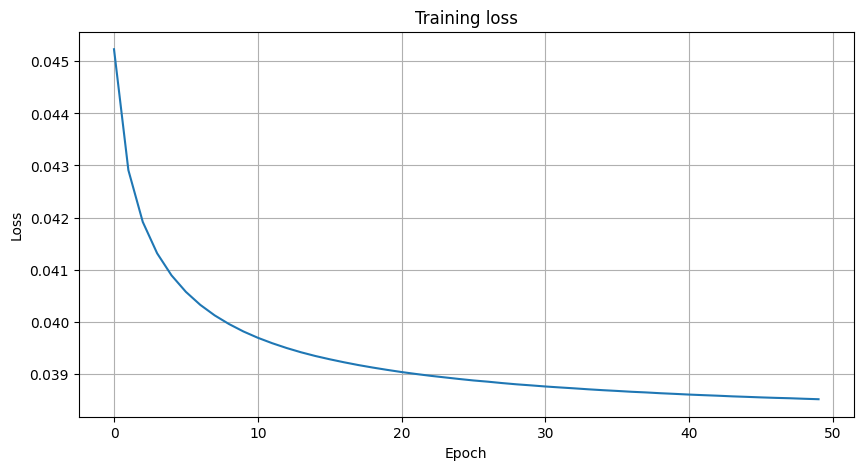

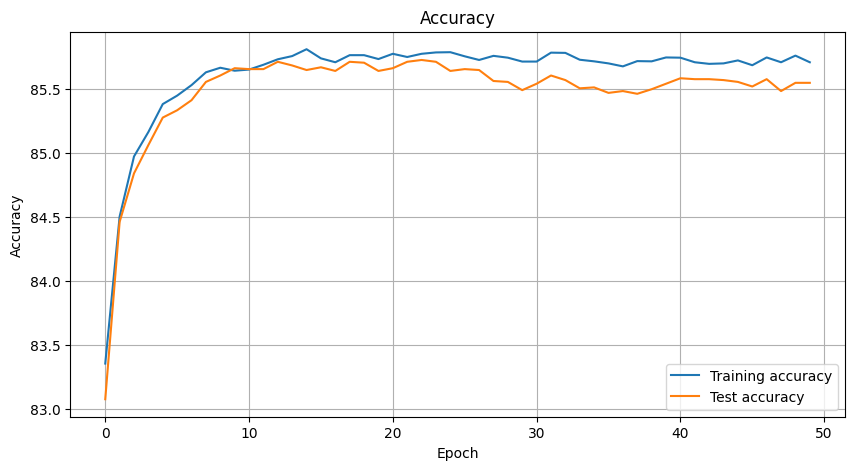

In [129]:
# Training the model
model = LinearModel()
criterion = MSE()
optimizer = SGD(model, lr=0.01)
batch_size = 1000
n_epochs = 50
n_iters = 1000
all_loss, train_acc, test_acc = train(model, X_train, y_train_oh, criterion, optimizer, batch_size, n_epochs, n_iters, X_test, y_test_oh)
print("-------------------------------------------------------------")
print("Training Accuracy with pytorch implementation is (Batch_size=100 and Learning_rate=0.001):" +str(max(train_acc)))
print("-------------------------------------------------------------")
print("Test Accuracy with pytorch implementation is (Batch_size=100 and Learning_rate=0.001):" +str(max(test_acc)))
print()
# Plot the training and test losses
plt.figure(figsize=(10, 5))
plt.plot(np.arange(n_epochs), all_loss)
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Plot the training and test
plt.figure(figsize=(10, 5))
plt.plot(np.arange(n_epochs), train_acc, label='Training accuracy')
plt.plot(np.arange(n_epochs), test_acc, label='Test accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()


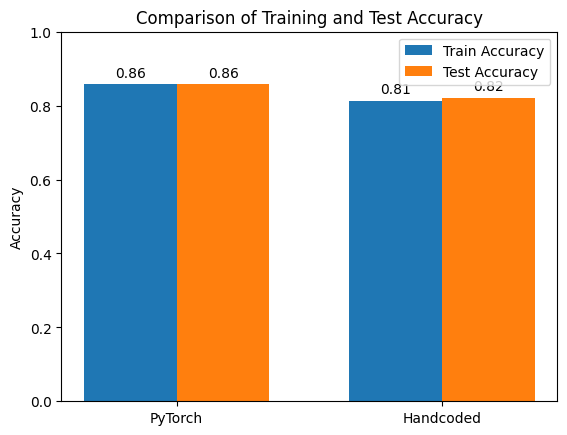

In [146]:
# Accuracy values for PyTorch model
pytorch_train_acc = 0.85812
pytorch_test_acc = 0.85728

# Accuracy values for Handcoded implementation
handcoded_train_acc = 0.81286
handcoded_test_acc = 0.82147

# Creating bar plot
labels = ['PyTorch', 'Handcoded']
train_acc = [pytorch_train_acc, handcoded_train_acc]
test_acc = [pytorch_test_acc, handcoded_test_acc]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, train_acc, width, label='Train Accuracy')
rects2 = ax.bar([i + width for i in x], test_acc, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Test Accuracy')
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Adding labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1)  
plt.show()
